In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#VGG16を使うここから実行してOK
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

Using TensorFlow backend.






58892288/58889256 [==============================] - 1s 0us/step








In [0]:

from keras import models
from keras import layers
from keras.optimizers import Adam

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(6,activation='softmax'))
conv_base.trainable=False
model.compile(optimizer=Adam(lr=1e-3),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 2,098,950
Non-trainable params: 14,714,688
_________________________________________________________________


In [0]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image

clsdir = "drive/My Drive/cluster0129"


datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.2,
            rescale=1./255
        )

train_generator=datagen.flow_from_directory(
            clsdir,
            target_size=(150,150),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "training"
        )

validation_generator = datagen.flow_from_directory(
            clsdir,
            target_size=(150,150 ),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "validation"
        )


Found 887 images belonging to 6 classes.
Found 218 images belonging to 6 classes.


In [0]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50
    )

Epoch 1/50
 62/100 [=================>............] - ETA: 7s - loss: 14.0662 - acc: 0.1273

KeyboardInterrupt: ignored

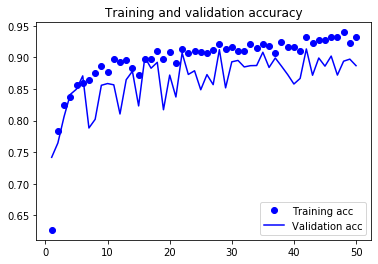

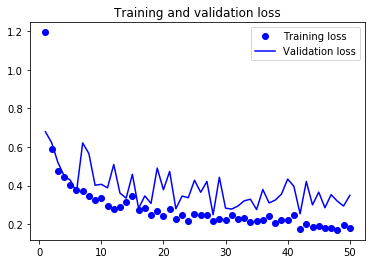

In [0]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [2]:
#ここからファインチューニング（VGG16をダウンロード）
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

Using TensorFlow backend.






58892288/58889256 [==============================] - 2s 0us/step








In [3]:
#畳み込み層の5層目のみを凍結解除
conv_base.summary()
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
#ファインチューニング用
from keras import models
from keras import layers
from keras.optimizers import Adam

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
#model.add(layers.Dropout(0.2))
model.add(layers.Dense(6,activation='softmax'))



In [6]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image


clsdir = "drive/My Drive/cluster0129"


datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.2,
            rescale=1./255
        )

train_generator=datagen.flow_from_directory(
            clsdir,
            target_size=(150,150),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "training"
        )

validation_generator = datagen.flow_from_directory(
            clsdir,
            target_size=(150,150 ),
            batch_size=20,
            class_mode='categorical',
            shuffle=True,
            subset = "validation"
        )

Found 887 images belonging to 6 classes.
Found 218 images belonging to 6 classes.


In [8]:
#モデルのコンパイル
model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 1542      
Total params: 16,813,638
Trainable params: 9,178,374
Non-trainable params: 7,635,264
_________________________________________________________________


In [9]:

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
100/100 [==============================] - 267s 3s/step - loss: 1.3748 - acc: 0.4941 - val_loss: 1.0908 - val_acc: 0.6038
Epoch 2/50
100/100 [==============================] - 23s 234ms/step - loss: 0.7764 - acc: 0.7362 - val_loss: 0.6324 - val_acc: 0.7848
Epoch 3/50
100/100 [==============================] - 23s 233ms/step - loss: 0.4738 - acc: 0.8422 - val_loss: 0.5063 - val_acc: 0.8216
Epoch 4/50
100/100 [==============================] - 22s 225ms/step - loss: 0.3653 - acc: 0.8741 - val_loss: 0.4097 - val_acc: 0.8414
Epoch 5/50
100/100 [==============================] - 24s 239ms/step - loss: 0.3087 - acc: 0.8842 - val_loss: 0.3501 - val_acc: 0.8690
Epoch 6/50
100/100 [==============================] - 24s 236ms/step - loss: 0.2776 - acc: 0.8960 - val_loss: 0.2872 - val_acc: 0.9030
Epoch 7/50
100/100 [==============================] - 23s 232ms/step - loss: 0.2501 - acc: 0.914

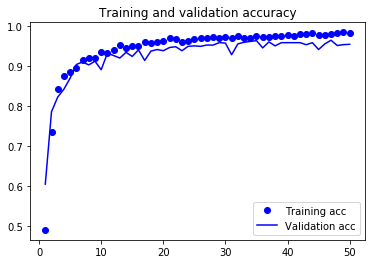

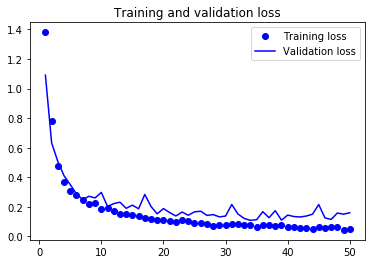

In [10]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
